In [262]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import plotly
from matplotlib import pyplot as plt
from plotly.graph_objs import Figure, Histogram, Layout


In [341]:
man=pd.read_csv('manhattan.csv')
man['Price']=man['Price'].apply(lambda x: float(re.sub('[,$]+',"",str(x))))
man['Bath']=man['Bath'].apply(lambda x: float(re.sub('[,$+]+',"",str(x))))
man['Bed']=man['Bed'].apply(lambda x: float(re.sub('[,$]+',"",str(x))))
man['Sqft']=man['Sqft'].apply(lambda x: float(re.sub('[,$]+',"",str(x))))
man['PricePerSqft']= round((man['Price']/man['Sqft']),2)
man['Area']='Manhattan'
man = man.groupby('Property').filter(lambda x : len(x)>5)
man = man.groupby('Bed').filter(lambda x : len(x)>10)

man=man.dropna(axis=0, how='all')
print(man.shape)
man.head()

(7001, 7)


,Bath,Bed,Price,Property,Sqft,PricePerSqft,Area
0,1.0,1.0,545000.0,Co-op,615.0,886.18,Manhattan
1,1.0,1.0,699000.0,Co-op,NaN,NaN,Manhattan
2,1.0,2.0,325000.0,Co-op,NaN,NaN,Manhattan
3,1.0,0.0,459000.0,Co-op,NaN,NaN,Manhattan
4,2.0,1.0,799000.0,Co-op,800.0,998.75,Manhattan


(6074, 7)


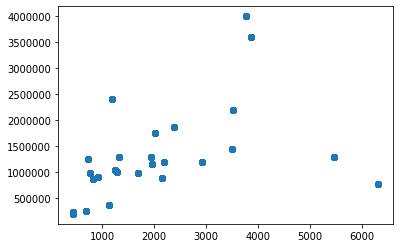

In [358]:
brk= pd.read_csv('brooklyn1.csv')
brk =brk.rename(columns={'House for Sale': 'Property','2':'Bed','1':'Bath','nan':'Sqft','$299,000':'Price'})
brk['Price']=brk['Price'].apply(lambda x: float(re.sub('[,$]+',"",str(x))))
brk['Bath']=brk['Bath'].apply(lambda x: float(re.sub('[,$+]+',"",str(x))))
brk['Bed']=brk['Bed'].apply(lambda x: float(re.sub('[,$]+',"",str(x))))
brk['Sqft']=brk['Sqft'].apply(lambda x: float(re.sub('[,$]+',"",str(x))))
brk['PricePerSqft']= round((brk['Price']/brk['Sqft']),2)
brk['Area']='Brooklyn'
brk = brk.groupby('Property').filter(lambda x : len(x)>5)
brk = brk.groupby('Bed').filter(lambda x : len(x)>10)

brk= brk.dropna(axis=0, how='all')
print(brk.shape)
plt.scatter(brk['Sqft'], brk['Price'])


In [359]:
queens = pd.read_csv('queens.csv')
queens = queens.rename(columns={'Condo': 'Property','nan':'Bed','nan.1':'Bath','840':'Sqft','$329,000':'Price'})
queens['Price']=queens['Price'].apply(lambda x: float(re.sub('[,$]+',"",str(x))))
queens['Bath']=queens['Bath'].apply(lambda x: float(re.sub('[,$+]+',"",str(x))))
queens['Bed']=queens['Bed'].apply(lambda x: float(re.sub('[,$]+',"",str(x))))
queens['Sqft']=queens['Sqft'].apply(lambda x: float(re.sub('[,$]+',"",str(x))))
queens['PricePerSqft']= round((queens['Price']/queens['Sqft']),2)
queens['Area']='Queens'
queens = queens.groupby('Property').filter(lambda x : len(x)>5)
queens = queens.groupby('Bed').filter(lambda x : len(x)>10)

queens = queens.dropna(axis=0, how='all')
print(queens.shape)
queens.head()

(8927, 7)


,Property,Bed,Bath,Sqft,Price,PricePerSqft,Area
0,Co-op,3.0,1.5,NaN,439000.0,NaN,Queens
1,House for Sale,4.0,2.0,1250.0,489000.0,391.2,Queens
4,Condos,2.0,2.0,NaN,540000.0,NaN,Queens
5,House for Sale,3.0,1.0,NaN,628000.0,NaN,Queens
6,House for Sale,3.0,1.0,1152.0,720000.0,625.0,Queens


In [360]:
jersey= pd.read_csv('jerseycity1.csv')
jersey = jersey.rename(columns={'House for Sale': 'Property','3':'Bed','3.1':'Bath','nan':'Sqft','$325,000':'Price'})
jersey['Price']=jersey['Price'].apply(lambda x: float(re.sub('[,$]+',"",str(x))))
jersey['Bath']=jersey['Bath'].apply(lambda x: float(re.sub('[,$+]+',"",str(x))))
jersey['Bed']=jersey['Bed'].apply(lambda x: float(re.sub('[,$]+',"",str(x))))
jersey['Sqft']=jersey['Sqft'].apply(lambda x: float(re.sub('[,$]+',"",str(x))))
jersey['PricePerSqft']= round((jersey['Price']/jersey['Sqft']),2)
jersey['Area']='Jersey City'
jersey = jersey.groupby('Property').filter(lambda x : len(x)>5)
jersey = jersey.groupby('Bed').filter(lambda x : len(x)>10)

jersey=jersey.dropna(axis=0, how='all')
print(jersey.shape)
jersey.head()

(747, 7)


,Property,Bed,Bath,Sqft,Price,PricePerSqft,Area
0,Multi-Family Home,6.0,3.0,NaN,510000.0,NaN,Jersey City
1,Condo/Townhome,2.0,2.0,1053.0,485000.0,460.59,Jersey City
4,Multi-Family Home,10.0,5.0,NaN,749000.0,NaN,Jersey City
5,Condo/Townhome,1.0,1.0,730.0,245000.0,335.62,Jersey City
6,House for Sale,4.0,1.0,NaN,329000.0,NaN,Jersey City


In [361]:
NY = man.append(brk, ignore_index=True, sort=True)
NY = NY.append(jersey, ignore_index=True, sort=True)
NY = NY.append(queens, ignore_index=True, sort=True)
print(NY.shape)
NY.head()

(22749, 7)


,Area,Bath,Bed,Price,PricePerSqft,Property,Sqft
0,Manhattan,1.0,1.0,545000.0,886.18,Co-op,615.0
1,Manhattan,1.0,1.0,699000.0,NaN,Co-op,NaN
2,Manhattan,1.0,2.0,325000.0,NaN,Co-op,NaN
3,Manhattan,1.0,0.0,459000.0,NaN,Co-op,NaN
4,Manhattan,2.0,1.0,799000.0,998.75,Co-op,800.0


In [258]:
group=NY.groupby('Area')
group.mean()

,Bath,Bed,Price,PricePerSqft,Sqft
Area,,,,,
Brooklyn,2.436181,3.124959,1.375528e+06,737.635238,2246.358054
Jersey City,1.789041,2.499331,7.010797e+05,721.493333,1012.037037
Manhattan,2.067499,1.971839,3.067136e+06,1722.902190,1793.146748
Queens,2.162597,3.465554,7.547632e+05,537.588939,1507.952009


In [329]:
NY[NY['Bed']<13]

,Area,Bath,Bed,Price,PricePerSqft,Property,Sqft
0,Manhattan,1.0,1.0,545000.0,886.18,Co-op,615.0
1,Manhattan,1.0,1.0,699000.0,NaN,Co-op,NaN
2,Manhattan,1.0,2.0,325000.0,NaN,Co-op,NaN
3,Manhattan,1.0,0.0,459000.0,NaN,Co-op,NaN
4,Manhattan,2.0,1.0,799000.0,998.75,Co-op,800.0
5,Manhattan,1.0,0.0,729000.0,1672.02,Condos,436.0
6,Manhattan,1.0,1.0,749000.0,966.45,Co-op,775.0
7,Manhattan,3.0,2.0,1499000.0,NaN,Co-op,NaN
8,Manhattan,2.0,0.0,1849000.0,977.27,Condos,1892.0
9,Manhattan,1.0,0.0,699000.0,1585.03,Condos,441.0


(array([6126., 5652., 4439., 2717., 1267., 1329.,  843.,    0.,  169.,
         207.]),
 array([ 0. ,  1.2,  2.4,  3.6,  4.8,  6. ,  7.2,  8.4,  9.6, 10.8, 12. ]),
 <a list of 10 Patch objects>)

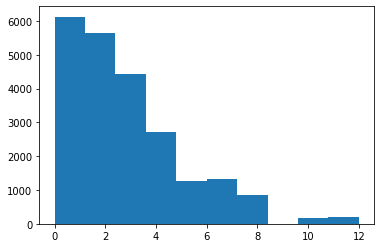

In [367]:
plt.hist(NY['Bed'])

In [310]:
man['Property'].value_counts()


Condos               3613
Co-op                3115
Townhomes             161
House for Sale        113
Condo                  75
Condop                 49
Multi-Family Home      40
Condo/Townhome          2
Apartment               1
Mfd/Mobile Home         1
Townhouse               1
Land                    1
Name: Property, dtype: int64

In [365]:
queens['Bed'].value_counts()

4.0     1871
3.0     1661
2.0     1660
1.0     1245
6.0      624
5.0      623
7.0      414
0.0      414
8.0      208
12.0     207
Name: Bed, dtype: int64

In [332]:
mang = man.groupby('Property')
mang.mean()

,Bath,Bed,Price,Sqft,PricePerSqft
Property,,,,,
Co-op,1.720758,1.709866,1.924274e+06,1399.736052,1145.788841
Condo,2.013333,1.617647,2.369912e+06,1838.980392,1576.873725
Condop,1.571429,1.632653,1.402571e+06,1089.037037,1291.973333
Condos,2.174805,2.001955,3.617923e+06,1646.171402,1910.415795
House for Sale,3.626263,3.650000,6.445317e+06,4379.770270,1628.792838
Multi-Family Home,5.716216,5.846154,5.560850e+06,5012.843750,983.364375
Townhomes,5.391473,4.614379,1.066788e+07,6428.733333,1635.578083


In [346]:
man['Bed'].value_counts().sort_values(ascending=False)

1.0    2205
2.0    2150
3.0    1141
0.0     726
4.0     474
5.0     172
6.0      82
8.0      28
7.0      23
Name: Bed, dtype: int64

In [168]:
man = man[man['Bed']<10]

(array([ 726., 2205., 2150., 1141.,    0.,  474.,  172.,   82.,   23.,
          28.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <a list of 10 Patch objects>)

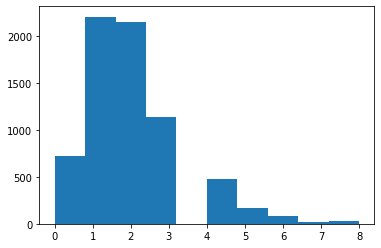

In [366]:
plt.hist(man['Bed'])

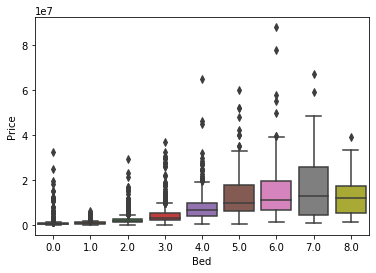

In [347]:
sns.boxplot(x='Bed',y='Price',data=man)

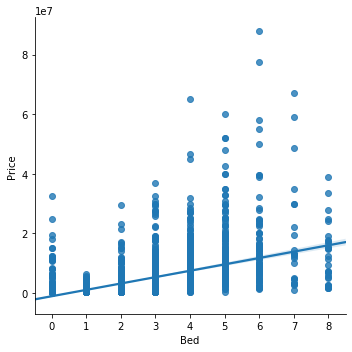

In [342]:
sns.lmplot("Bed", "Price", man, palette="Set2")

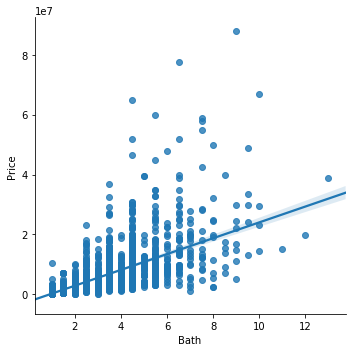

In [343]:
sns.lmplot("Bath", "Price", man, palette="Set2")

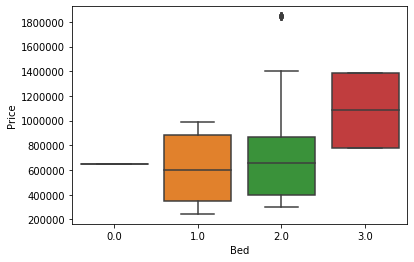

In [137]:
sns.boxplot(x='Bed',y='Price',data = jersey)

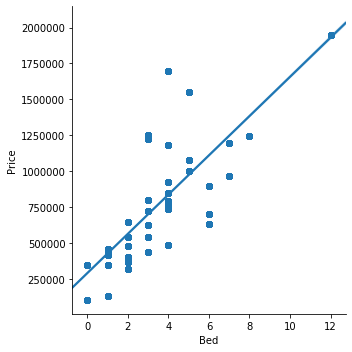

In [345]:
sns.lmplot("Bed", "Price", queens, palette="Set2")

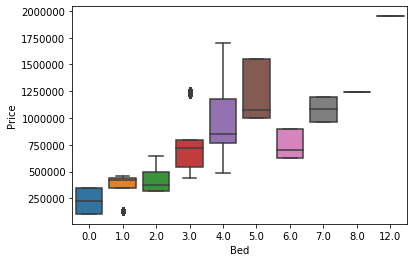

In [362]:
sns.boxplot(x='Bed',y='Price',data=queens)

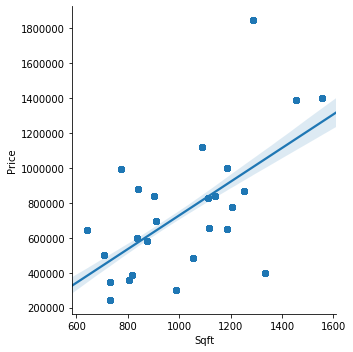

In [378]:
sns.lmplot("Sqft", "Price", jersey)

(array([ 726., 2205.,    0., 2150.,    0., 1141.,    0.,  474.,    0.,
         172.,    0.,   82.,    0.,   23.,   28.]),
 array([0.        , 0.53333333, 1.06666667, 1.6       , 2.13333333,
        2.66666667, 3.2       , 3.73333333, 4.26666667, 4.8       ,
        5.33333333, 5.86666667, 6.4       , 6.93333333, 7.46666667,
        8.        ]),
 <a list of 15 Patch objects>)

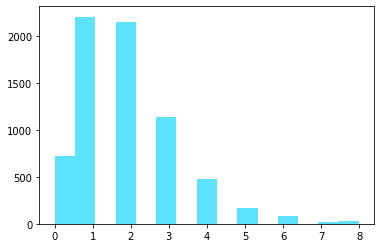

In [357]:
plt.hist(man['Bed'], bins=15, color="#5ee3ff")

Text(0, 0.5, 'Area')

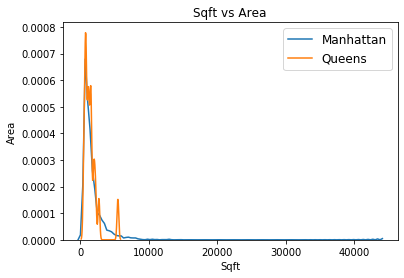

In [373]:
df = NY[NY.Area == 'Manhattan']
sns.distplot(df['Sqft'], hist = False, kde = True, label='Manhattan')
df = NY[NY.Area == 'Queens']
sns.distplot(df['Sqft'], hist = False, kde = True, label='Queens')
# Plot formatting
plt.legend(prop={'size': 12})
plt.title('Sqft vs Area')
plt.xlabel('Sqft')
plt.ylabel('Area')

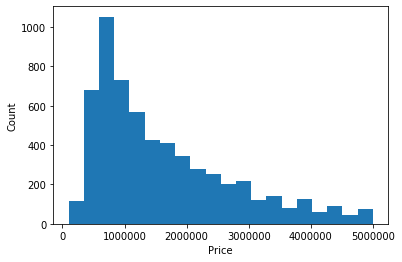

In [393]:
mand= man[man['Price']<5000000]

sns.distplot(
    mand['Price'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Price', ylabel='Count');

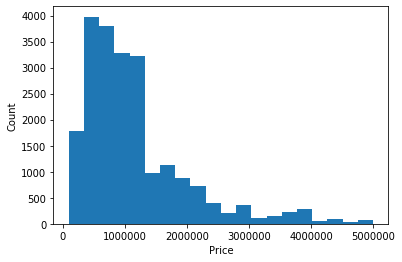

In [396]:
NYd= NY[NY['Price']<5000000]

sns.distplot(
    NYd['Price'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Price', ylabel='Count');